# IMPORTAÇÕES DE DEPENDÊNCIAS DO PROJETO

In [36]:
from pathlib import Path
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython
import seaborn as sns

# LEITURA DA TABELA

In [37]:
table = Path("most_popular_programming_languages​_from_2004_to_2022.csv").absolute()

df = pd.read_csv(table)

# LIMPEZA DE DADOS

In [38]:
# verificação se existe células vazias
# df.isna().sum()

In [39]:
df["Date"] = pd.to_datetime(df["Date"])

In [40]:
# verificação de tipo de dados da células
# df.info()

# visualização de dados

In [ ]:
sns.set_theme(style="darkgrid")


def generate_color_series(n: int, palette: str) -> tuple:
    segments = cm.get_cmap(palette, n)
    return segments(range(n))


Text(0, 0.5, 'Linguagens de programação')

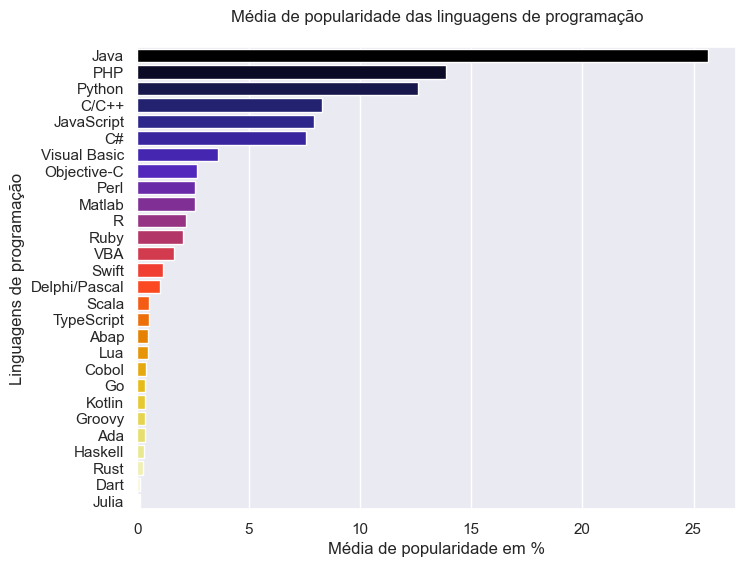

In [269]:
data_mean_list = []

for column in df:
    if column == "Date":
        pass
    else:
        data_mean_list.append([column, df[column].mean()])

data_mean = pd.DataFrame(data_mean_list, columns=["language", "mean"])
data_mean = data_mean.sort_values(by=["mean"], ascending=False)

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.title("Média de popularidade das linguagens de programação\n")
sns.barplot(
    data=data_mean,
    x="mean",
    y="language",
    saturation=1,
    palette=generate_color_series(n=28, palette="CMRmap")
)
plt.xlabel("Média de popularidade em %")
plt.ylabel("Linguagens de programação")

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data_mean_top10 = data_mean.nlargest(10, "mean")
plt.title("Top 10  média de popularidade\n")
donut_top10 = plt.Circle((0, 0), 0.7, color="white")
plt.pie(
    data_mean_top10["mean"], 
    labels=data_mean_top10["language"],
    wedgeprops={
        "linewidth": 5,
        "edgecolor": "white",
    },
    colors=generate_color_series(n=10, palette="PuOr")
)
plot = plt.gcf()
plot.gca().add_artist(donut_top10)

In [ ]:
top10_linechart_color = generate_color_series(n=10, palette="magma")
plt.figure(figsize=(14, 8))

for index, element in enumerate(data_mean["language"]):
    plt.plot(
        df["Date"],
        df[element],
        color=top10_linechart_color[index],
        label=element
    )
    plt.legend()

    if index == 9:
        break

plt.title("Popularidade das linguagens de programação\n")
plt.xlabel("Ano")
plt.ylabel("Média da popularidade em %")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


# ANIMAÇÃO DAS PLOTS

In [268]:
dict_data = df.copy()
dict_data.drop(["Date"], axis=1, inplace=True)
series_data = dict_data.to_dict()

bar_label = [key for key in dict_data]

bar_color = generate_color_series(n=28, palette="CMRmap")

fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 35)


def animate(i: int):
    i_value = []
    for key in dict_data:
        i_value.append(dict_data[key][i])

    i_value = tuple(i_value)
    date_bar = df.Date[i].strftime("%Y %B")
    ax.cla()
    ax.set_xlim(0, 35)
    ax.barh(bar_label, i_value, color=bar_color)
    ax.set_title(f"Popularidade em % em: {date_bar}", loc="left")
    plt.gca().invert_yaxis()


ani = FuncAnimation(
    fig, 
    animate, 
    repeat=False,
    frames=len(dict_data)
)
%time ani.save("bar_animation.gif", writer="imagemagick", fps=5)
plt.close()

MovieWriter imagemagick unavailable; using Pillow instead.


CPU times: total: 31.6 s
Wall time: 1min 37s
